In [1]:
import numpy as np
from lanczos import *
from timeIntegration import *
from plotting import *
from utils import *
from IPython.display import display, HTML, Markdown, Math, Latex

## Exercise 1
Here we compare Lanczos bidiagonalization with and without reorthogonalization with the rank $k$ best approximation of a invertible matrix A. The rank $k$ approximation from the Lanczos bidiagonalization SVD-approach are denoted $W$, and with the subscript $\perp$ if reorthogonalization is used. The rank k best approximation is denoted $X$.


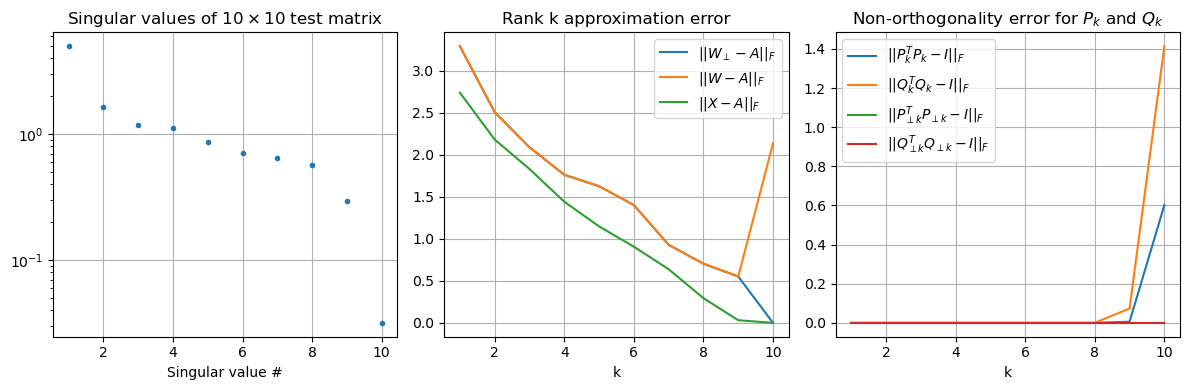

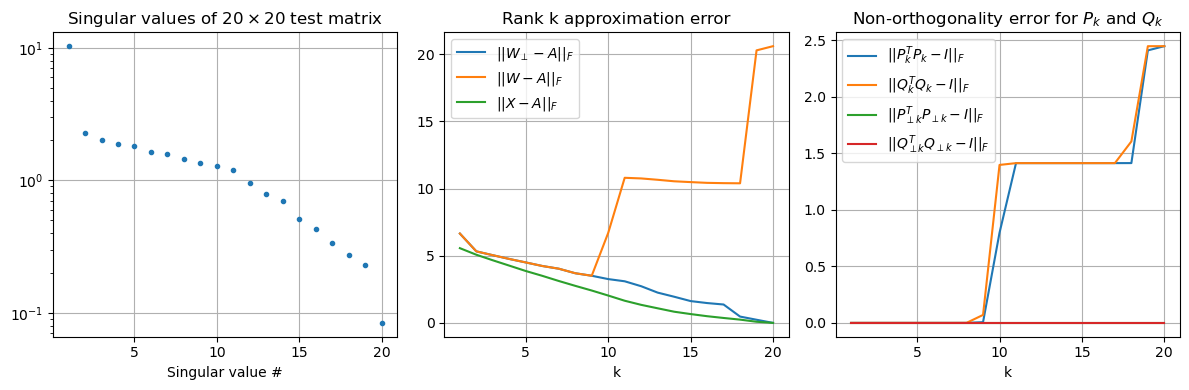

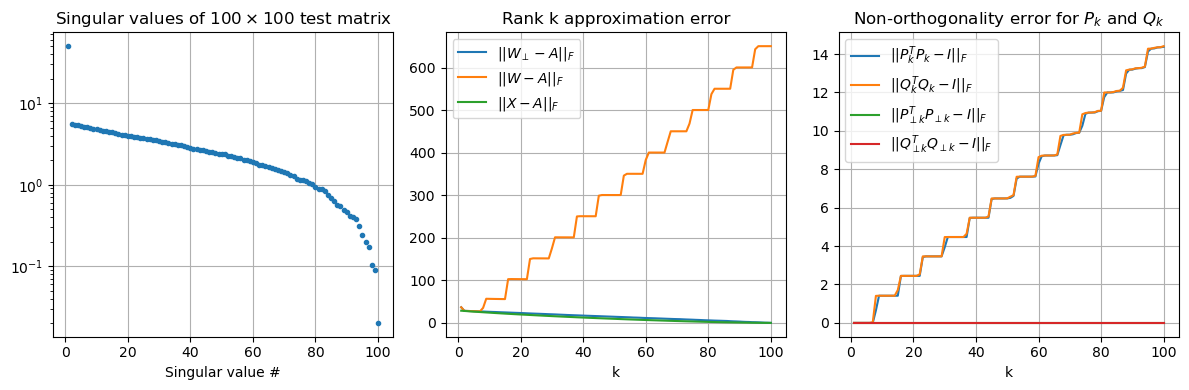

In [2]:
CompareRankkApproximation(ns=[10, 20, 100], res=4)

Comment something interpretation

## Exercise 3)
Here we compute a low rank approximation of a solution to the heat equation

\begin{aligned}
u_t & =u_{x x}+u_{y y} & & {[x, y]^T \in \Omega, t \in(0, T] } \\
u(x, y, 0) & =g(x, y) & & {[x, y]^T \in \Omega } \\
u(x, y, t) & =0 & & {[x, y]^T \in \partial \Omega, t \in(0, T] }
\end{aligned}

with 
$u(x, y, t)=e^{-5 \pi^2 t} \sin (\pi x) \sin (2 \pi y)$ 

and

$g(x, y)=\sin (\pi x) \sin (2 \pi y)$.


When evaluating $u$ on a grid, the resulting matrix is of rank 1, and therefore it is reasonable for the low-rank approximation to also be of rank 1, since it can't be any lower and it won't help being any higher.

We initiate the problem and plot the initial solution. 

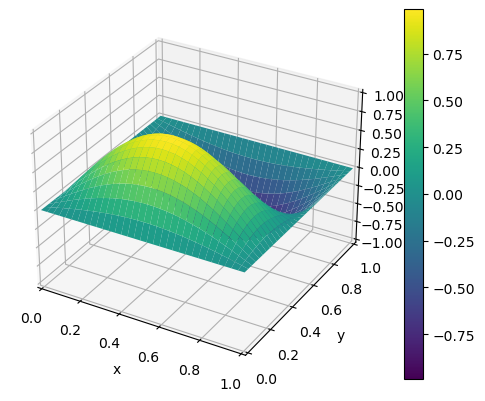

In [3]:
N = 32
k = 1

t0 = 0
tf = 0.2
h0 = 0.0005
A0 = initval(g, N)
U0, S0, V0 = getU0S0V0(A0, k)
TOL = 1e-5
maxcuts = 3
m = n = N+1
plotGrid3D(A0)

Starting integrating at t:0, with step size 0.0005
Finished integrating in 4401 steps, 2.8397457599639893s


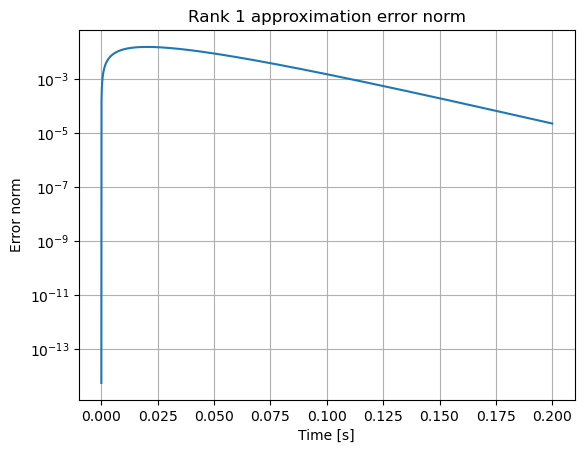

In [4]:

Ulist, Slist, Vlist, timesteps, dUlist, dSlist, dVlist, tRUn= TimeIntegration(t0, tf, h0, U0, S0, V0, 
                diff, linMatODEStep, 
                cay=cay1, verbose = 1,
                TOL= TOL, maxTimeCuts=maxcuts)
Ylist = makeY(Ulist, Slist, Vlist)
plotRankApproxError(Ylist, u, timesteps, k)

We see that the error is reasonable. At the beginning it is zero, then increases a bit as the true solution evolves, and then the error decreases as the solution approaches zero.

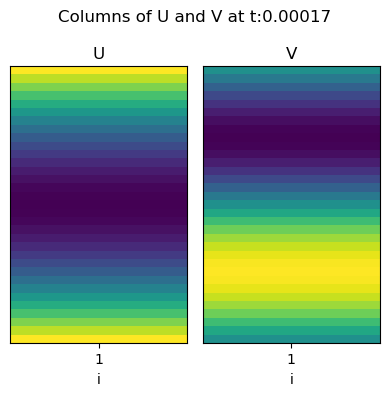

In [5]:
Ulist[1].shape
index = 10
plotCols(Ulist[index], Vlist[index], timesteps[index], res=2)

Here we clearly see that the single column of $U$ resembles a slice of the solution parallell to the x-axis and similiar for V and the y-axis. We know that in the SVD decomposition $A = USV^T$, the column space of $U$ equals the columns space of $A$ and the row space of $V$ equals the row space of $A$. From the plot of the solution we would expect that the U column has two peaks and the V column has one peak, but this is because the matrices are rotated $90$ degress in the code.

## Exercise 4)
Here we compute a low rank approximation of 

\begin{equation*}
    A(t)=Q_1(t)\left(A_1+e^t A_2\right) Q_2(t)^T, \quad t \in[0,1]
\end{equation*}

Which is computed as explained in the project description and in the article by Kock and Lubich. 

When contructing this function with $\epsilon > 0$, the matrix will be of full rank at all times. For $\epsilon = 0$ the matrix (of size $n^2 \times n^2$ will be of rank $n$, and the singular values $\sigma_m$ for $m>n$ will be zero. For nonzero $\epsilon$, the singular values $\sigma_m$ for $m>n$ will depend on the parameter $\epsilon$. 

This means that as $\epsilon$ decreases, so does the effective rank of $A(t)$ and it should be easier to compute a low-rank-approximation, and we expect the error to decrease. 


Below is an animation of this matrix with parameter $\epsilon=1e-3$

In [17]:
A, dA = makeAfuncs(eps=1e-3)
%matplotlib inline
name1 = animateMatrix(A)
HTML(f'<img src={name1} />')

MovieWriter Pillow unavailable; using Pillow instead.


Now we do the low rank time integration with different $\epsilon$'s used for constructing $A$.

In [7]:
# epss = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epss = [1e-1, 1e-3, 1e-4, 1e-5]
ks = [10, 12, 20]
TOL = 1e-2
resultsByKByEps = {}
for k in ks:
    resultsByKByEps[k] = GetTimeIntegrationResults(epss=epss, k=k, verbose=0,
                            TOL=TOL)


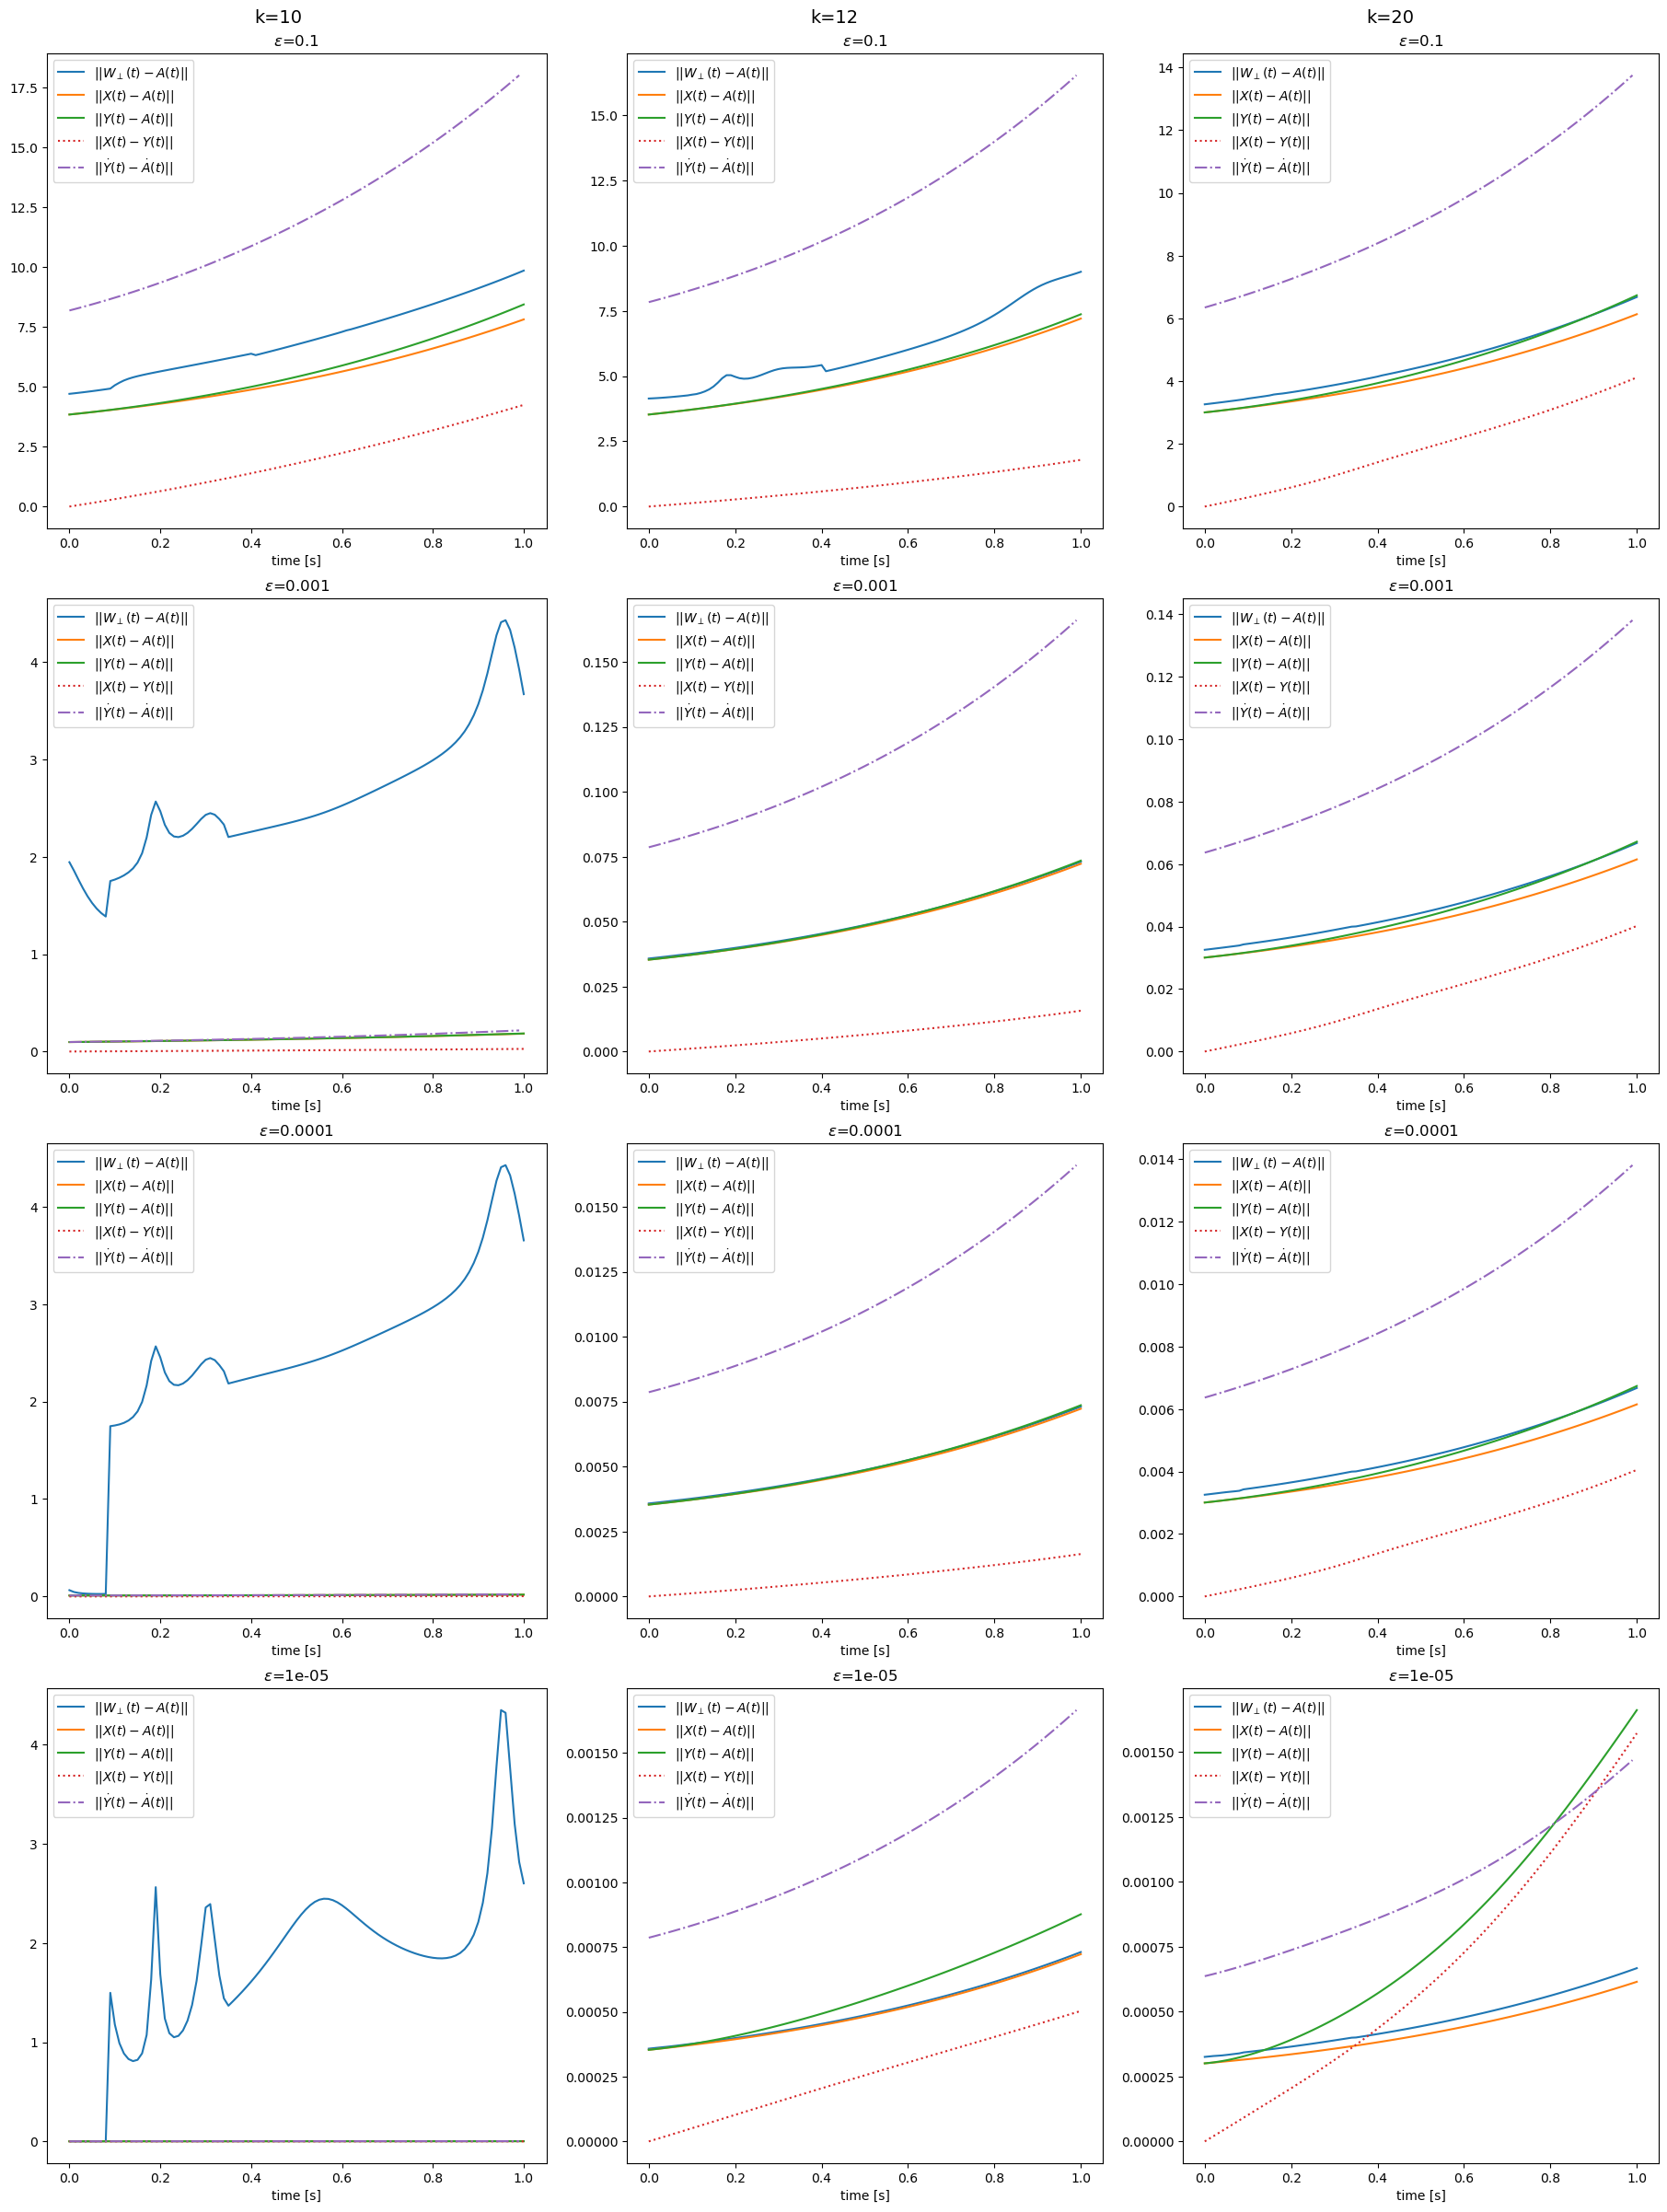

In [8]:
ksToPlot = len(ks)
epssToPlot = len(epss)
plotErrors(resultsByKByEps, ks, epss, ksToPlot, epssToPlot, res=6)

Here we see that the lanczos algorithm does not work properly for $k=10$ and $\epsilon < 0.1$. This may be because the initial guess, which is chosen as the column with greates norm of the matrix we want to approximate. In this case we want to approximate $A(t)$, which has about $12$ singular values that are significantly greater than zero. And by only using a rank $10$ approximation we don't capture all the action.

In [9]:
tables = makeTables(resultsByKByEps)
# Loop through the tables dictionary to display each table with a title
for k, df_k in tables.items():
    display(HTML(f"<h3>Table for k={k}</h3>"))
    display(df_k)

,$\epsilon$,$||W(t)-A(t)||$,$||X(t)-A(t)||$,$||Y(t)-A(t)||$,$||X(t)-Y(t)||$,$||\dot{Y}(t)-\dot{A}(t)||$
3,0.00001,2.601243,0.001837,0.001908,0.000518,0.002167
2,0.00010,3.653848,0.018365,0.018555,0.002651,0.021628
1,0.00100,3.670640,0.183439,0.185337,0.026756,0.216236
0,0.10000,9.851263,7.813547,8.437960,4.245291,18.006455


,$\epsilon$,$||W(t)-A(t)||$,$||X(t)-A(t)||$,$||Y(t)-A(t)||$,$||X(t)-Y(t)||$,$||\dot{Y}(t)-\dot{A}(t)||$
3,0.00001,0.000731,0.000723,0.000877,0.000504,0.001665
2,0.00010,0.007308,0.007227,0.007361,0.001633,0.016604
1,0.00100,0.073081,0.072270,0.073478,0.015703,0.166049
0,0.10000,9.001382,7.208022,7.372167,1.790105,16.536917


,$\epsilon$,$||W(t)-A(t)||$,$||X(t)-A(t)||$,$||Y(t)-A(t)||$,$||X(t)-Y(t)||$,$||\dot{Y}(t)-\dot{A}(t)||$
3,0.00001,0.000667,0.000615,0.001662,0.001573,0.001469
2,0.00010,0.006675,0.006150,0.006737,0.004052,0.013808
1,0.00100,0.066745,0.061498,0.067169,0.040197,0.138076
0,0.10000,6.680917,6.132426,6.734299,4.115281,13.750129


## Exercise 5)



In [10]:
Acos, dAcos = makeAfuncs(cosMult=True)
%matplotlib inline
name = animateMatrix(Acos, tf=10, length=5, name="cosMatrix")
HTML(f'<img src={name} />')

MovieWriter Pillow unavailable; using Pillow instead.


Starting integrating at t:0, with step size 0.1
Finished integrating in 143 steps, 9.747637510299683s


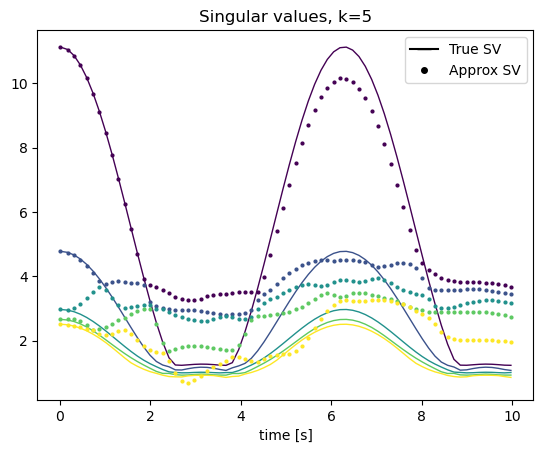

Starting integrating at t:0, with step size 0.1
Finished integrating in 200 steps, 13.916985273361206s


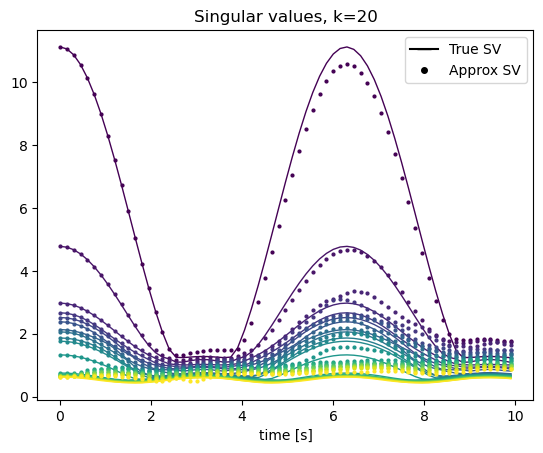

In [23]:
n=10
ks=[5, 20]
eps=1e-1
TOL = 1e-1
maxcuts=5
pointsInPlot = 60
verbose = 1
RunSVComparison(n=n, ks=ks, numPoints=pointsInPlot, TOL=TOL,
                maxcuts=maxcuts, verbose=verbose, eps=eps,
                cosMult=True, tf=10)

Here we see that for $k=5$, the singular values of the low rank approximation deviates quite a bit from the true singular values of $A(t)$, while for $k=20$ there is a much closer correspondence. An interesting observation is that in the first plot where $k=5$, the approximated singular values are greater than the true singular values, while the opposite is the case in the article by Koch and Lubich in the reference section of the project description.

In [24]:
epss = [1e-1, 1e-3, 1e-4, 1e-5]
ks = [5, 20]
TOL = 1e-1
tf=10
h0 = 0.1
resultsByKByEps2 = {}
for k in ks:
    resultsByKByEps2[k] = GetTimeIntegrationResults(epss=epss, k=k, verbose=0,
                            TOL=TOL, cosMult=True, tf=tf, h0=h0)

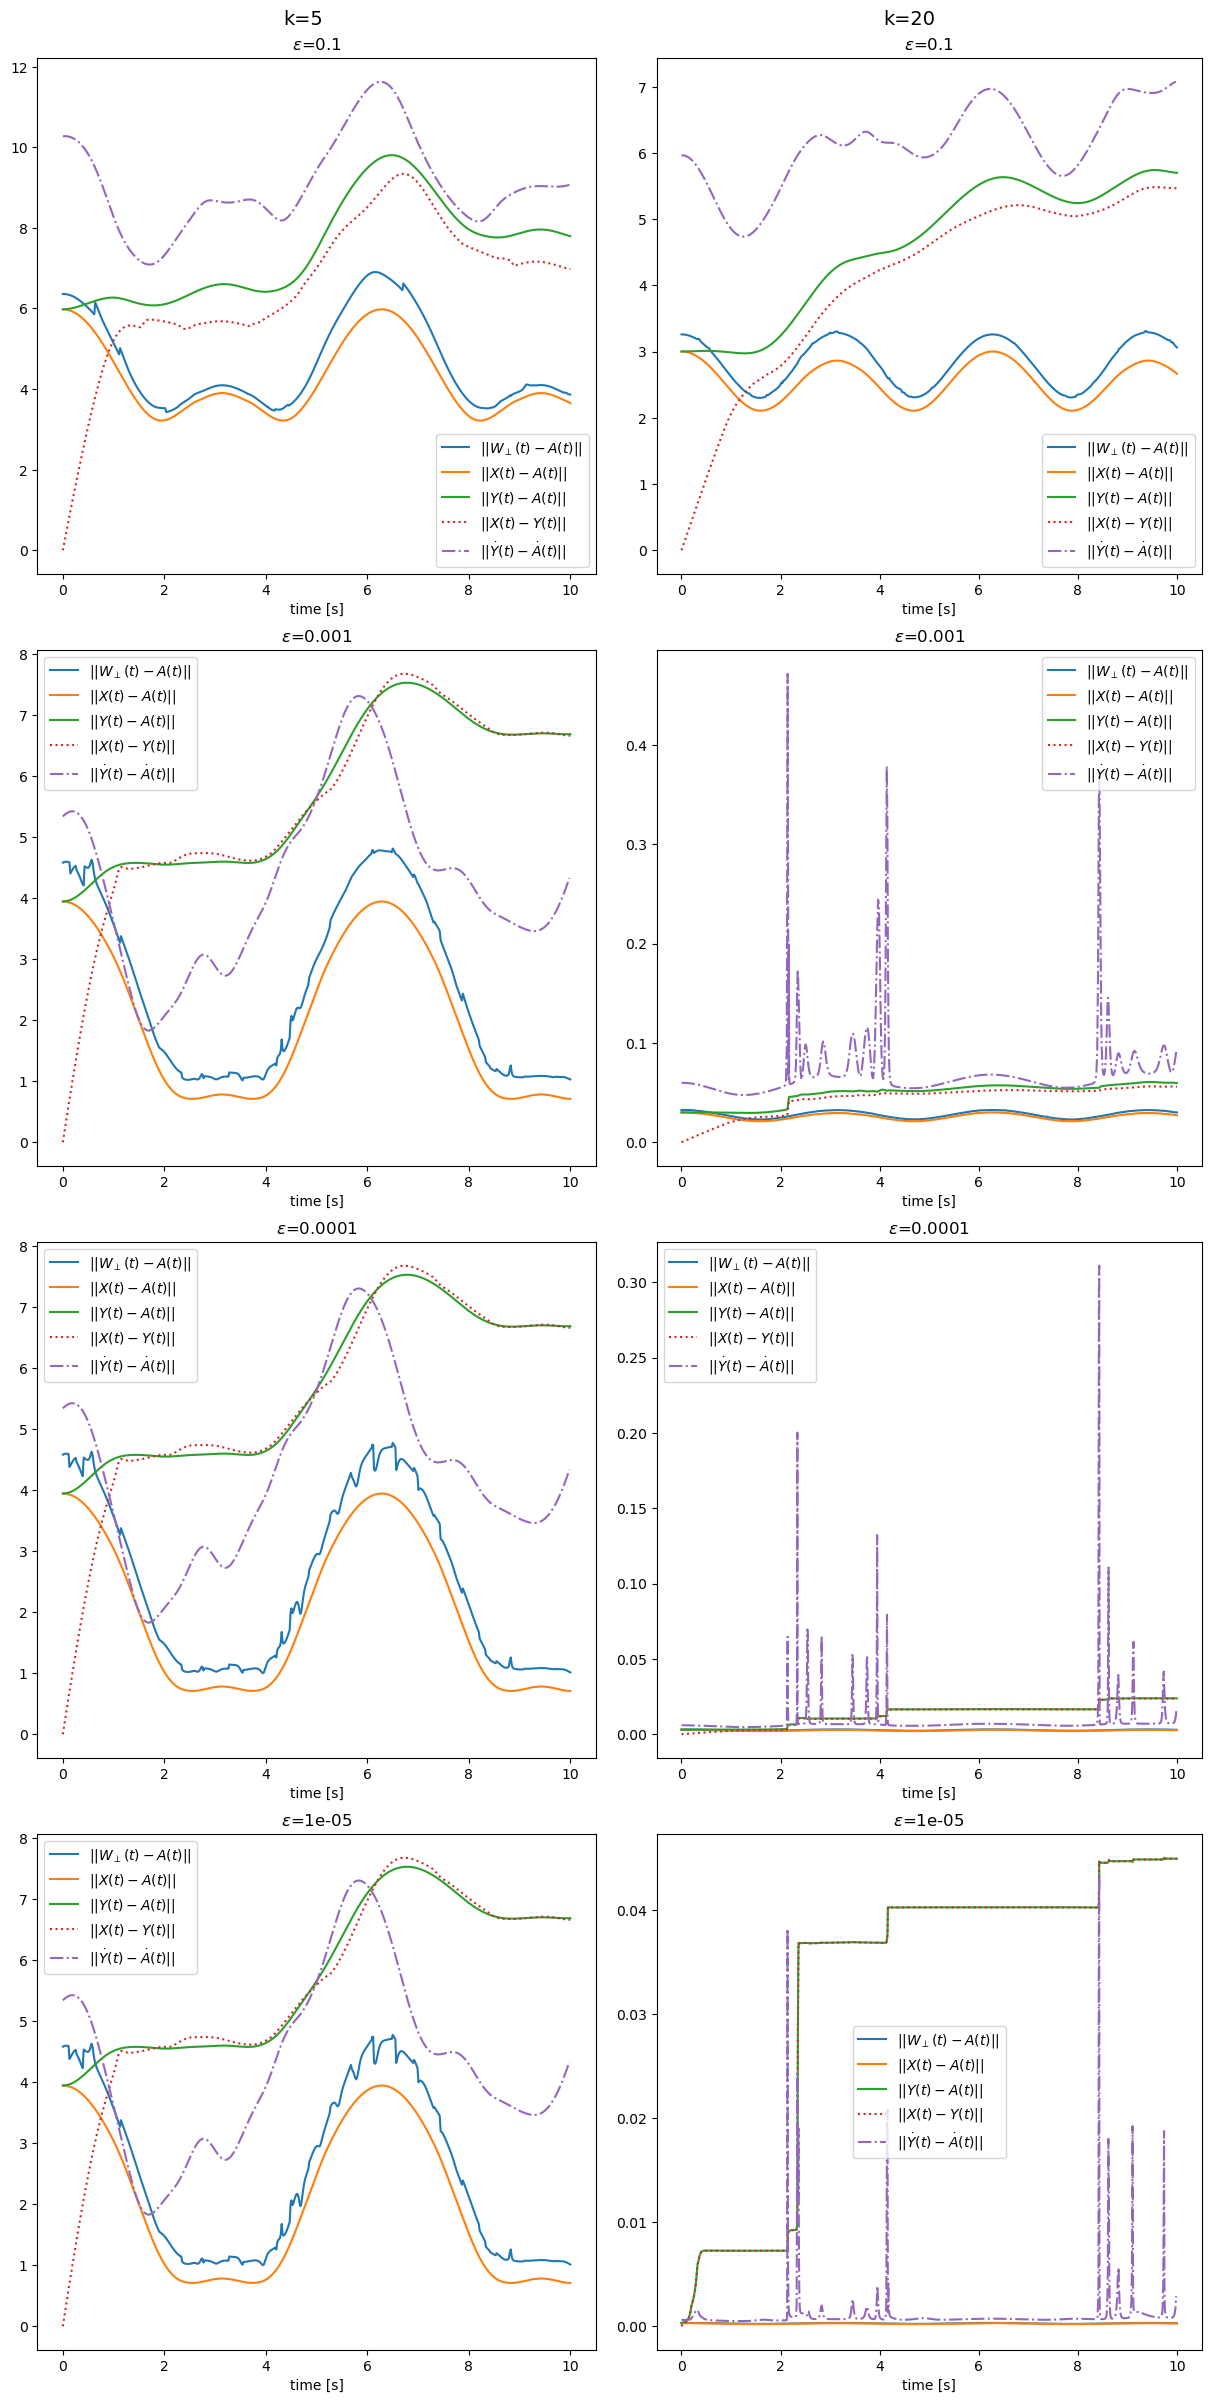

In [ ]:
ksToPlot = 2
epssToPlot = len(epss)
plotErrors(resultsByKByEps2, ks, epss, ksToPlot, epssToPlot, res=6)

We observe that the dynamic low rank approximation geerally is bad, while the lanczos approximation is somewhat better and the best approximation is best. As explained in the article by Koch and Lubich, this may be because initially small eigenvalues becomes large. For Lanczos and the best approximation this is not a problem because they always compute the $k$ highest singular values, but it seems like the dynamic approachs tracks the initially large singular values, even though they shrink and is no longer largest after some time has passed. The resulting dynamic approximation is then computed with singular values which may not be approximations of the currently largest singular values, anf thus the approximation may be poor. 

For $k=5$ we see that the error is big for different values of $\epsilon$, but for $k=20$ the approximation gets better as $\epsilon$ decreases. In The right column and all but the first row, we see that there is a big error in the derivatives where the singular are close, which may be a source of the error. 